In [161]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

# 1. Dataset

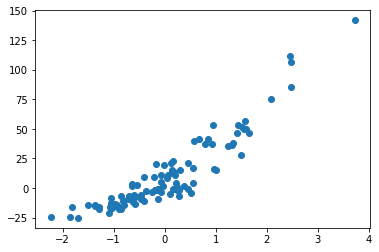

In [162]:
x, y = make_regression(n_samples = 100, n_features = 1, noise = 10) #noise pour ajouter du bruit
y = y + abs(y/2)

plt.scatter(x, y)

Verifions les dimesions de notre matrice

In [163]:
#Verification des dimensions
print(x.shape)
print(y.shape)

#redimensionner y
y = y.reshape(y.shape[0], 1) #reshape,present dans numpy, pour redimensionner la matrice y 
print(y.shape)

(100, 1)
(100,)
(100, 1)


In [164]:
# Creation de la matrice X, inclut le Biais
X = np.hstack((x, np.ones(x.shape)))# hstack permet de coller deux vecteurs numpy l'un a cote de l'autre
X = np.hstack((x**2, X))
print(X.shape)
print(X[:10])

(100, 3)
[[ 2.26694178e+00 -1.50563667e+00  1.00000000e+00]
 [ 2.03105950e-02  1.42515245e-01  1.00000000e+00]
 [ 4.29117896e-03 -6.55070909e-02  1.00000000e+00]
 [ 1.84352576e+00 -1.35776499e+00  1.00000000e+00]
 [ 1.30827498e-02  1.14379849e-01  1.00000000e+00]
 [ 5.92005468e-02 -2.43311625e-01  1.00000000e+00]
 [ 6.00403214e+00  2.45031266e+00  1.00000000e+00]
 [ 5.00956888e+00 -2.23820662e+00  1.00000000e+00]
 [ 1.65394330e-01 -4.06687017e-01  1.00000000e+00]
 [ 1.14594666e+00 -1.07048898e+00  1.00000000e+00]]


In [165]:
#Initialisation du vecteur theta aleatoir
theta = np.random.randn(3, 1)
theta

array([[ 1.19187768],
       [-0.7416912 ],
       [-0.4316193 ]])

# 2. Modele Lineaire

In [166]:
def model(X, theta):
    return X.dot(theta)

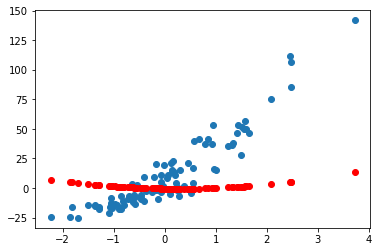

In [167]:
plt.scatter(x[:,0], y)
plt.scatter(x[:,0], model(X, theta), c = 'r')

# 3. Fonction cout : Erreur Quadratique Moyenne

On mesure les erreurss du modele sur le dataset X, y en implementter l'erreur quadratique moyenne, Mean Squared Error (MSE) en anglais

Ensuite, on teste notre fonction pour voir s'il n'y a pas de bug

In [168]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [169]:
cost_function(X, y, theta)

481.92123057139315

# 4. Gradients et Descente de Gradient

In [170]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [178]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    
    cost_history = np.zeros(n_iterations) #en ajoutant cette ligne, on veut verifier si la machine reussit a bien apprendre
    
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta)
        cost_history[i] = cost_function(X, y, theta)
        
    return theta, cost_history

# 5. Entrainement du modele : Machine Learning 

In [179]:
n_iterations = 1000
learning_rate = 0.01

theta_final , cost_history = gradient_descent(X, y, theta, learning_rate, n_iterations) #on augmente le nombre de learning_rate, 
#on le passe de 0.001 a 0.01

In [180]:
theta_final #Voici les parametres du modele une fois que la achine a ete entrainee

array([[ 4.70112578],
       [22.57299076],
       [ 4.47681873]])

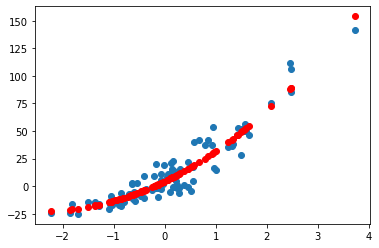

In [181]:
#Creation d'un vecteur predictions qui contient les predictions de notre Dataset
predictions = model(X, theta_final)

#Affiche les resultats de predictions (en rouge) par rapport a notre Dataset (en bleu)
plt.scatter(x[:,0], y)
plt.scatter(x[:,0], predictions, c = 'r')

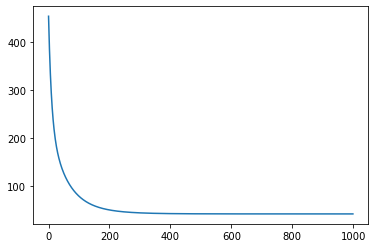

In [183]:
plt.plot(range(n_iterations),cost_history) #La descente de gradient converge et se termine sur un plateau

# 7. Coefficient de determination

Ce coefficient de determination permet d'evaluer la performance d'un modele de regresion lineaire. => R carre
Ce cofficient permet de montrer aux autres la reelle performance de notre modele. Plus le R carre est proche de 1, plus le modele rentre dans son nuage de points

In [184]:
def coef_determination(y, pred):
     u = ((y - pred)**2).sum() #le residu de la somme des carres, on fait une difference entre nos vraies valeurs et celles 
        #qui sont predite par notre modele
     v = ((y - y.mean())**2).sum() #la somme total de carre
     return 1 - u/v

In [185]:
coef_determination(y, predictions) #Le coefficient est assez proche de 1

0.9059135349881919